## G　logistic回帰モデルを用いた手書き文字画像の分類

MNIST datasetは有名なデータセットのひとつです。手書きで書かれた0-9までの数字の画像データと、その書かれた数字を表すラベルデータから構成されています。今回はそのうち「7」と「9」の画像のみを扱うことにしましょう。

**目標** : 「7」か「9」の手書き数字画像を入力すると、それが「7」か「9」かを自動で識別してくれる仕組みを作る。

今回はlogistic回帰モデルというモデルを用いて「7」画像と「9」画像を自動で識別できる仕組みを作りましょう。

### 準備 : small MNIST datasetの読み込み
small MNIST datasetは「0」から「9」の画像が1797枚レコードされています。画像サイズは8×8 pixel、色深度は4bit gray scaleです。

`sklearn`パッケージの`datasets`モジュールにある`load_digits`メソッドを用いると、small MNIST datasetを読み込むことが出来ます。
* data : 訓練用の画像
* target : dataにレコードされている画像それぞれのラベル

を`numpy.array`の形で得ることが出来ます。

In [1]:
# MNISTデータセットのimport
from sklearn.datasets import load_digits
X, y = load_digits().data, load_digits().target
X.shape, y.shape

((1797, 64), (1797,))

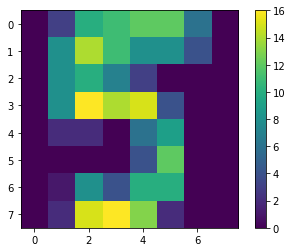

In [2]:
# 画像の確認
import matplotlib.pyplot as plt
plt.imshow(X[1003, :].reshape(8, 8))
plt.colorbar()
plt.show()

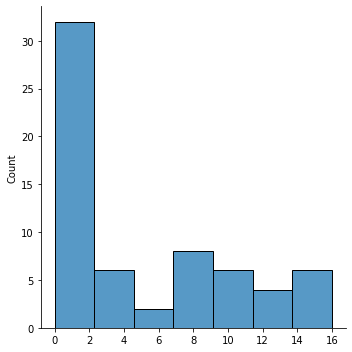

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(X[1003,:]) #X[1003,:]の輝度ヒストグラム
plt.show()

In [4]:
# 画像データの最小値と最大値
X.min(), X.max()

(0.0, 16.0)

In [5]:
# 画像のラベル
import numpy as np
np.unique(y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

今回は「7」画像と「9」画像のみを用いるので、ここで事前に抽出しておきます。

In [6]:
# ラベルが7/9の画像のindexを取得する。
index = np.where((y == 7) | (y == 9)) #|はまたはを意味する

In [7]:
# ラベルが7/9の画像を抽出する。
X, y = X[index], y[index]
X.shape, y.shape

((359, 64), (359,))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #訓練データとテストデータに8:2で分けている

In [9]:
X_train.shape, X_test.shape

((287, 64), (72, 64))

In [10]:
# 「7」画像と「9」画像の枚数の確認
np.unique(y_train, return_counts = True), np.unique(y_test, return_counts = True)

((array([7, 9]), array([149, 138])), (array([7, 9]), array([30, 42])))

「7」画像と「9」画像のみを抽出した結果、
* 訓練データ : 「7」画像138件, 「9」画像149件, 合計287件
* テストデータ : 「7」画像41件, 「9」画像31件, 合計72件

になりました。

### データの確認
今回の実習のように、画像を識別できる仕組みを作るタスクを**画像認識タスク**といいます。画像認識タスクでは、その難易度を自分で知っておくためにも、画像を自分の目で確認することがとても重要です。最初の10枚の画像を確認して、どれくらい手書き文字が汚いのかをチェックしておきましょう。

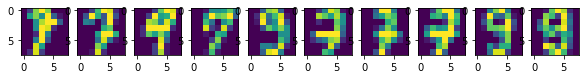

In [11]:
# 画像の確認
import matplotlib.pyplot as plt
n_images = 10
plt.figure(figsize = (10, 100))
for i in range(n_images):
    plt.subplot(1, n_images, i + 1)
    plt.imshow(X_train[i].reshape(8, 8))
plt.show()

In [12]:
y_train[0:10]

array([7, 7, 9, 7, 9, 7, 7, 7, 9, 9])

### logistic回帰モデル

#### logistic回帰モデルの実装
logistic回帰モデルには様々な学習アルゴリズムの設定値があり、この設定によって学習の様子は大きく変わってきます

In [13]:
# logistic回帰モデルの実装
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty = "l2", C = 100.0) 

In [14]:
#y_trainっていう答えを元に、画像データX_trainが7か9か予測するlogistic回帰モデルのパラメータを決定する
logistic.fit(X_train, y_train)

/Users/sugakubunka/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100.0)

In [15]:
logistic.intercept_, logistic.coef_

(array([-13.71367721]),
 array([[ 0.00000000e+00, -8.41389448e-02, -2.85362348e-01,
          1.37719006e-01,  2.13489875e-01, -7.52415607e-02,
         -1.45649531e-01, -1.50105352e-01,  0.00000000e+00,
          6.25034789e-03, -9.87943526e-03, -7.27021510e-02,
         -5.20115672e-01,  1.14692460e-02, -3.53561065e-02,
         -8.18297857e-02,  0.00000000e+00,  6.16823116e-01,
          6.99645090e-01,  3.82785231e-01,  1.95670507e-01,
         -1.56921150e-02,  1.61316413e-01, -2.27348830e-03,
          0.00000000e+00,  2.32274688e-01,  2.89349509e-01,
          7.97406970e-01,  3.47731005e-01,  5.83415388e-02,
         -2.76868712e-01,  0.00000000e+00,  0.00000000e+00,
         -2.88434216e-01, -1.51280955e-01, -9.61601190e-02,
         -1.39218269e-01, -1.14631624e-02, -7.13152329e-02,
          0.00000000e+00,  0.00000000e+00,  8.12075934e-03,
         -2.11673501e-01, -6.24854251e-01, -3.29640075e-01,
          3.13126941e-01,  1.07623149e-01, -3.57860421e-04,
          0.0000

In [16]:
logistic.classes_

array([7, 9])

In [17]:
# 予測器が出来ていることを確認する
import numpy as np
np.set_printoptions(precision = 8, floatmode = "maxprec")
pred_train_proba = logistic.predict_proba(X_train) #7である確率と9である確率を予測
pred_train_proba[:5, :]    # 先頭5行のみ確認

array([[9.99674633e-01, 3.25367374e-04],
       [9.99998220e-01, 1.78023044e-06],
       [4.13413802e-05, 9.99958659e-01],
       [9.99999420e-01, 5.79967311e-07],
       [1.26905597e-10, 1.00000000e+00]])

### モデルの評価
モデル評価は訓練データ、テストデータともに行う必要があります。訓練データでのモデル評価が悪い場合、より複雑なモデルを選択することを視野に入れる必要があるからです。またテストデータでの正答率が訓練データよりも著しく悪い場合、モデルをより単純にする必要が出てくるためです。これらは**過剰適合**・**過小適合**という言葉で議論されます。

今回モデルの評価を行う方法の一例として、
* 正答率
* 混同行列

を書いてみましょう。

#### 訓練データでの評価

In [18]:
# 訓練データでの精度
from sklearn.metrics import accuracy_score
pred_train = logistic.predict(X_train)
accuracy_score(y_true = y_train, y_pred = pred_train)

1.0

In [19]:
# 訓練データでの混同行列
from sklearn.metrics import confusion_matrix
pred_train = logistic.predict(X_train)
confusion_matrix(y_true = y_train, y_pred = pred_train)

array([[149,   0],
       [  0, 138]])

#### テストデータでの評価

In [20]:
# テストデータでの精度（演習）
from sklearn.metrics import accuracy_score
pred_test = logistic.predict(X_test)
accuracy_score(y_true = y_test, y_pred = pred_test)

1.0

In [21]:
# テストデータでの混同行列（演習）
from sklearn.metrics import confusion_matrix
pred_test = logistic.predict(X_test)
confusion_matrix(y_true = y_test, y_pred = pred_test)

array([[30,  0],
       [ 0, 42]])

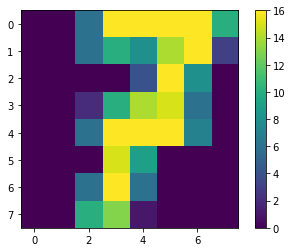

In [22]:
# 画像の確認
import matplotlib.pyplot as plt
plt.imshow(X_test[32].reshape(8, 8))
plt.colorbar()
plt.show()

In [23]:
y_test[32]

7

In [24]:
# 予測器が出来ていることを確認する
import numpy as np
np.set_printoptions(precision = 8, floatmode = "maxprec")
pred_test = logistic.predict_proba(X_test) #7である確率と9である確率を予測
pred_test[32, :]

array([1.00000000e+00, 5.28403624e-13])

### モデルの解釈
モデルを評価する際に、モデルを解釈するのはとても大事なことです。モデルがどうやって「7」画像と「9」画像を識別できるのか少しでも把握しておくことで、

* モデルが適切に画像を識別できているか？
* どのような画像に対してはモデルが識別しづらそうか？

などを事前に考えるきっかけを得られるからです。

[課題]　「1」と「７」、「8」と「９」などでlogstic回帰を試してみてください。その際、下記の手法で画像のどこに着目しているか考えてみてください。また、正則化を入れた場合と入れなかった場合で、どのように結果が変わるかを見てみましょう。

In [25]:
# 切片
logistic.intercept_

array([-13.71367721])

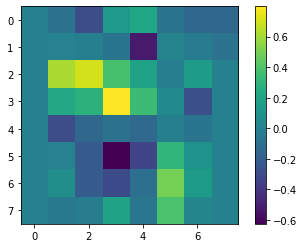

In [26]:
# 画像のどこに注目しているか
import matplotlib.pyplot as plt
weights = logistic.coef_
plt.imshow(weights.reshape(8, 8))
plt.colorbar()
plt.show()